In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players_data = pd.read_csv('players_data.csv')
club_tournaments = pd.read_csv('./raw_data/club_tournament.csv')
players_data_F = players_data[players_data['position'] == 'F']  # Forwards
players_data_D = players_data[players_data['position'] == 'D']  # Defenders
players_data_G = players_data[players_data['position'] == 'G']  # Goalkeepers
players_data_M = players_data[players_data['position'] == 'M']  # Midfielders
players_data_FMD = players_data[players_data['position'].isin(['F', 'M', 'D'])]  # Forwards, Midfielders, Defenders 

### Giới thiệu về bộ dữ liệu

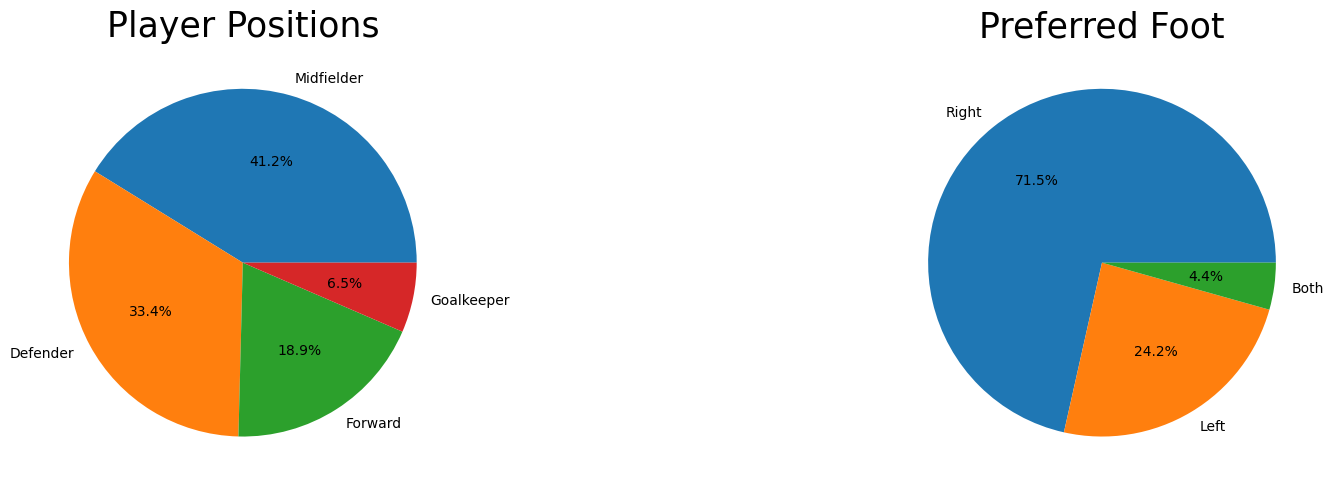

In [3]:
position_labels = []
for position in players_data['position'].value_counts().index:
    if position == 'G':
        position_labels.append('Goalkeeper')
    elif position == 'D':
        position_labels.append('Defender')
    elif position == 'M':
        position_labels.append('Midfielder')
    elif position == 'F':
        position_labels.append('Forward')
        
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(players_data['position'].value_counts(), labels=position_labels, autopct='%1.1f%%')
plt.title('Player Positions',fontsize=25) 

plt.subplot(1, 2, 2)
plt.pie(players_data['preferred_foot'].value_counts().values, labels= players_data['preferred_foot'].value_counts().index, autopct='%1.1f%%')
plt.title('Preferred Foot',fontsize=25) 

plt.tight_layout() 


In [4]:
print("Number of nations:", len(players_data['country'].unique()))
print("Number of leagues:", len(players_data['league'].unique())) 

Number of nations: 13
Number of leagues: 15


### Trực quan hóa dữ liệu điểm

           Value
Median  6.880000
Mean    6.904831
Std     0.204993
Max     8.280000
Min     6.340000


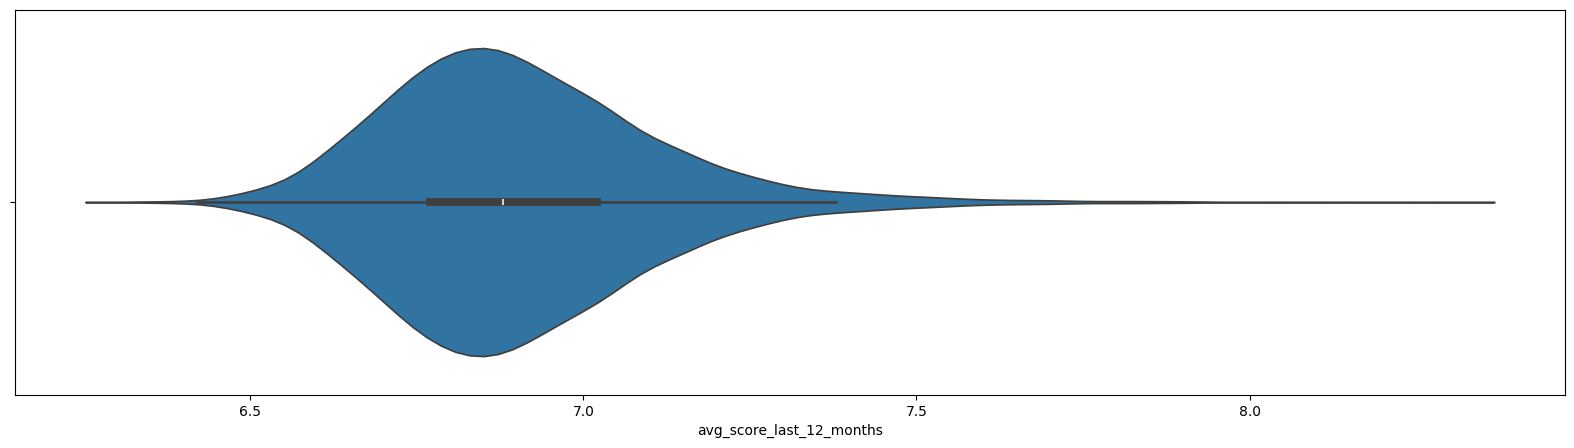

In [5]:
plt.figure(figsize=(20, 5))
sns.violinplot(x = players_data['avg_score_last_12_months']) 
print(pd.DataFrame([np.median(players_data['avg_score_last_12_months'].astype(float)),
                np.mean(players_data['avg_score_last_12_months'].astype(float)),
                np.std(players_data['avg_score_last_12_months'].astype(float)),
                np.max(players_data['avg_score_last_12_months'].astype(float)),
                np.min(players_data['avg_score_last_12_months'].astype(float))],index=['Median','Mean','Std', 'Max', 'Min'],columns=['Value']))

### Trực quan dữ liệu số trận tham gia

            Value
Median  26.000000
Mean    26.391904
Std      8.146778
Max     62.000000
Min     10.000000


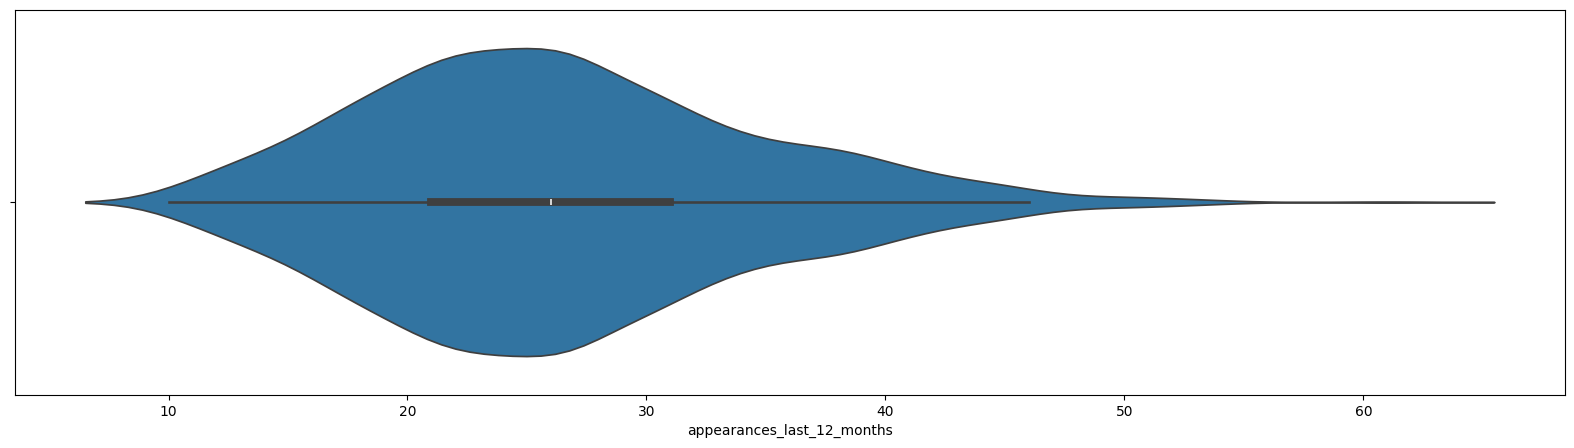

In [6]:
plt.figure(figsize=(20, 5))
sns.violinplot(x = players_data['appearances_last_12_months']) 
print(pd.DataFrame([np.median(players_data['appearances_last_12_months'].astype(float)),
                np.mean(players_data['appearances_last_12_months'].astype(float)),
                np.std(players_data['appearances_last_12_months'].astype(float)),
                np.max(players_data['appearances_last_12_months'].astype(float)),
                np.min(players_data['appearances_last_12_months'].astype(float))],index=['Median', 'Mean','Std', 'Max', 'Min'],columns=['Value']))

### Trực quan dữ liệu chiều cao cầu thủ (sửa lại khi đã có data clean)

             Value
Median  180.000000
Mean    180.440836
Std       6.788104
Max     203.000000
Min     156.000000


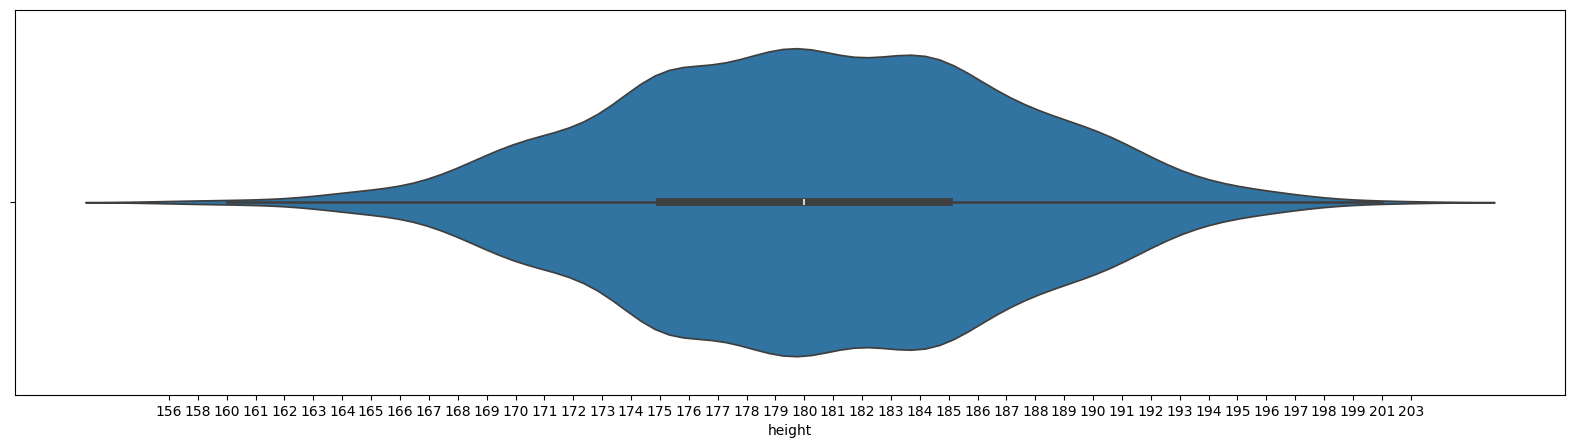

In [7]:
height_data = players_data['height']
height_data = height_data[height_data.str.len() == 6]
height_data = height_data.str[:3].sort_values(ascending=True)  

plt.figure(figsize=(20, 5))
sns.violinplot(x = height_data) 
print(pd.DataFrame([np.median(height_data.astype(int)),
                np.mean(height_data.astype(int)),
                np.std(height_data.astype(int)),
                np.max(height_data.astype(int)),
                np.min(height_data.astype(int))],index=['Median', 'Mean', 'Std','Max', 'Min'],columns=['Value']))

### Trực quan dữ liệu tuổi (sửa lại khi đã có data clean)

            Value
Median  27.000000
Mean    27.661477
Std      4.378316
Max     43.000000
Min     16.000000


<Axes: xlabel='age'>

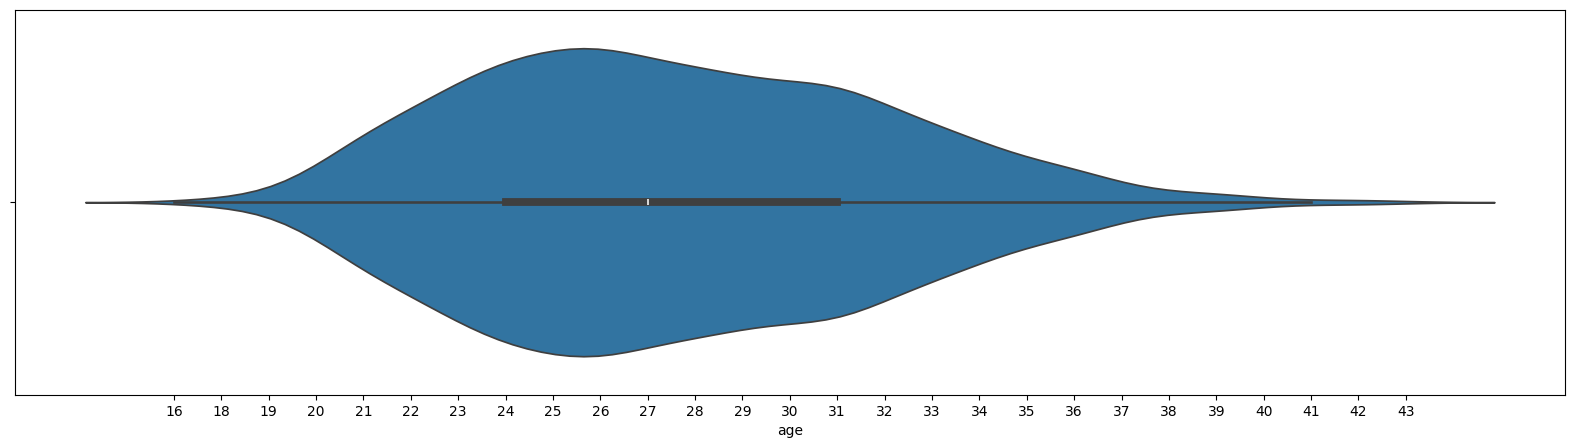

In [8]:
age_data = players_data['age']
age_data = age_data[age_data.str.len() == 6]
age_data = age_data.str[:2].sort_values(ascending=True) 
print(pd.DataFrame([np.median(age_data.astype(int)),
                np.mean(age_data.astype(int)),
                np.std(age_data.astype(int)),
                np.max(age_data.astype(int)),
                np.min(age_data.astype(int))],index=['Median', 'Mean', 'Std', 'Max', 'Min'],columns=['Value']))
plt.figure(figsize=(20, 5))
sns.violinplot(x = age_data)  

### Trực quan dữ liệu giá trị chuyển nhượng cầu thủ

### Boxplot các thông số theo vị trí

Text(0.5, 0.98, 'Boxplot of Player Attributes by Position')

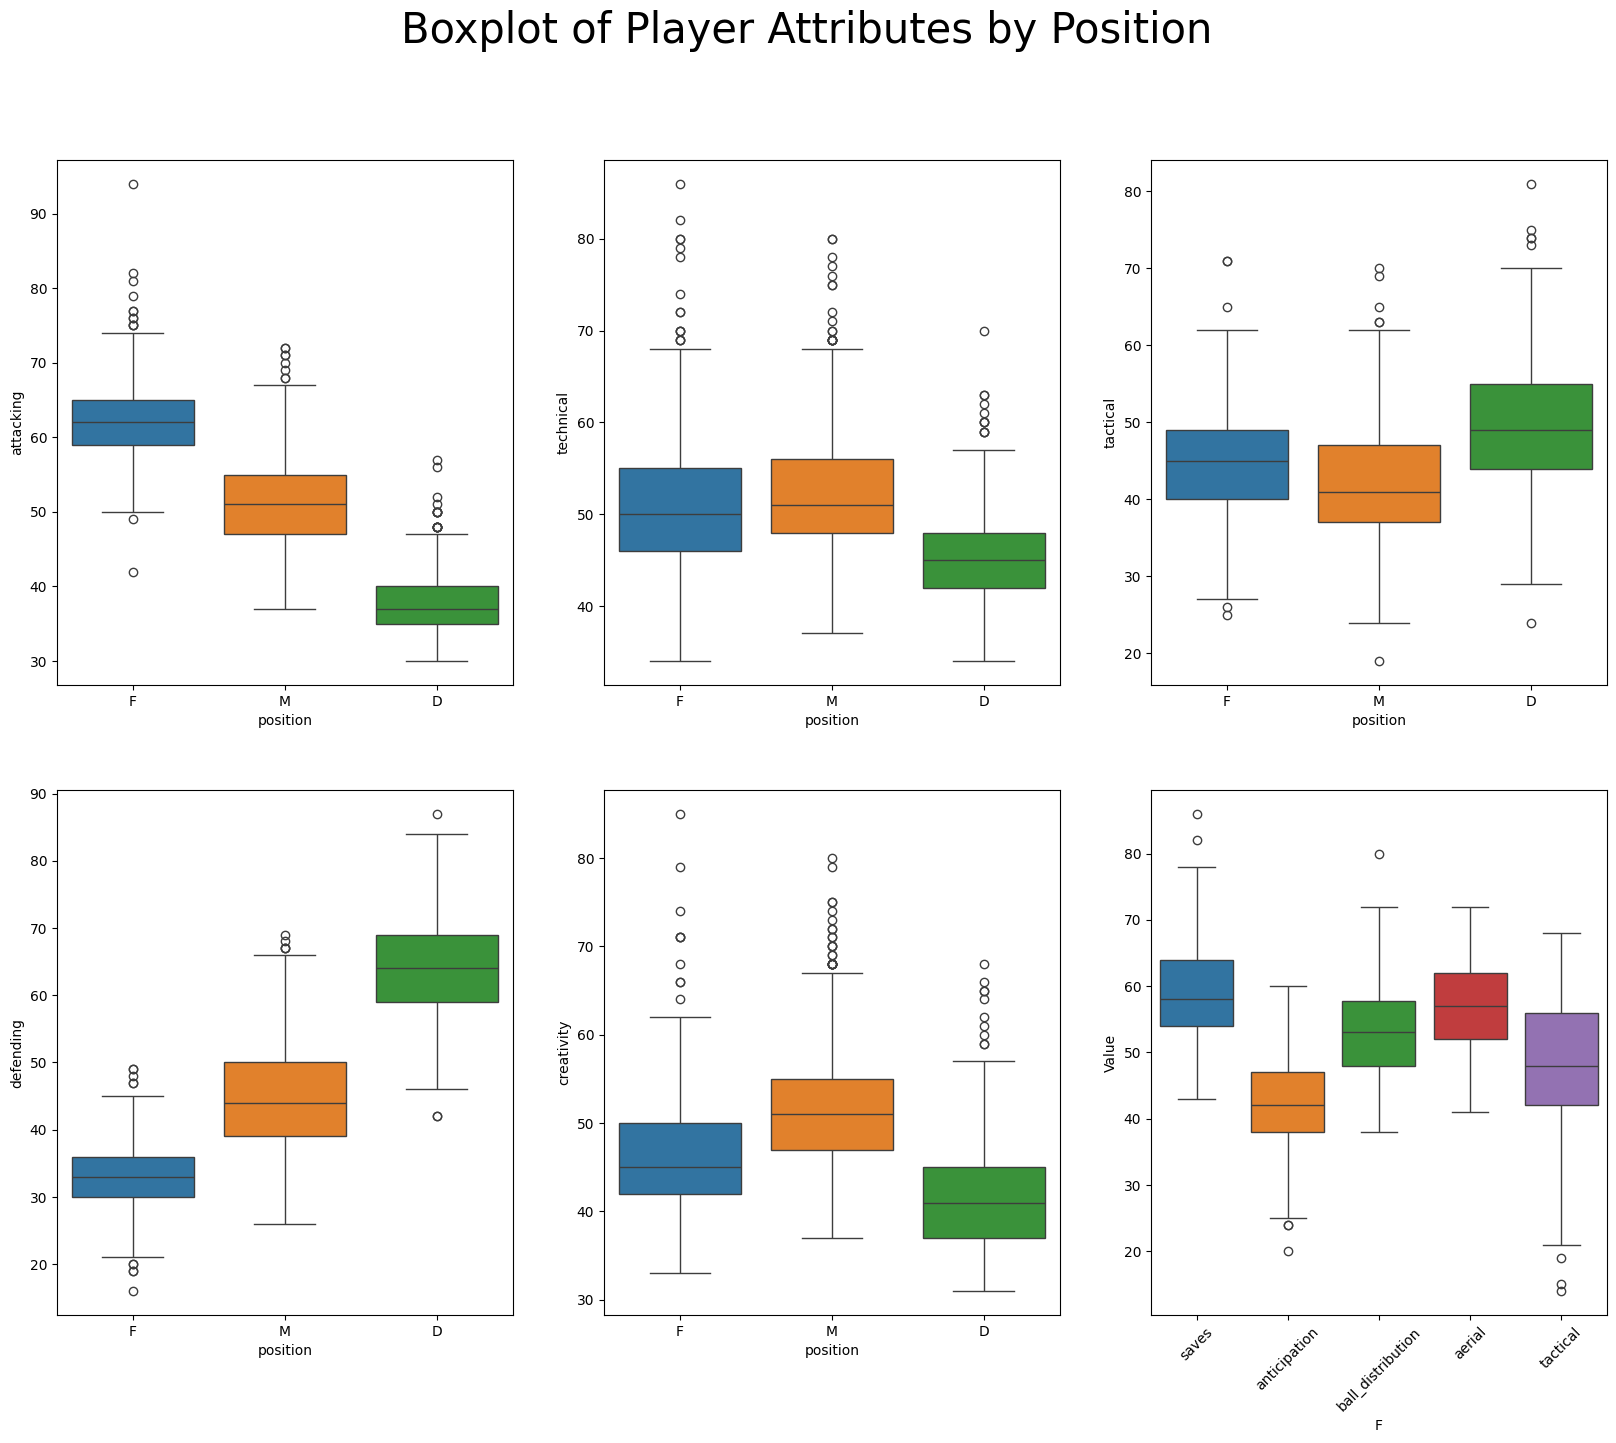

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))

# Biểu đồ boxplot cho từng thuộc tính
sns.boxplot(ax=axes[0, 0], x='position', y='attacking', hue='position', data=players_data_FMD)
sns.boxplot(ax=axes[0, 1], x='position', y='technical', hue='position', data=players_data_FMD)
sns.boxplot(ax=axes[0, 2], x='position', y='tactical', hue='position', data=players_data_FMD)
sns.boxplot(ax=axes[1, 0], x='position', y='defending', hue='position', data=players_data_FMD)
sns.boxplot(ax=axes[1, 1], x='position', y='creativity', hue='position', data=players_data_FMD)
sns.boxplot(ax=axes[1, 2], data=players_data_G[['saves' , 'anticipation' ,  'ball_distribution' , 'aerial' , 'tactical']])
axes[1, 2].set_xlabel('F')
axes[1, 2].set_ylabel('Value')
axes[1, 2].tick_params(axis='x', rotation=45)

fig.suptitle('Boxplot of Player Attributes by Position', fontsize=30) 
    